<a href="https://colab.research.google.com/github/flysaurus/PumpitUp/blob/master/PumpitUp_E2E_MLv0_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Understand the business problem
## Pump It Up
* **Objective**: Predict which water pumps are faulty
Using data from Taarifa and the Tanzanian Ministry of Water, predict which pumps are functional, which need some repairs, and which don't work at all? This is an intermediate-level practice competition. Predict one of these three classes based on a number of variables about what kind of pump is operating, when it was installed, and how it is managed. A smart understanding of which waterpoints will fail can improve maintenance operations and ensure that clean, potable water is available to communities across Tanzania.

https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/

### Following are the available datasets

**Submission format**	- The format for submitting your predictions

**Test set values**- The independent variables that need predictions

**Training set labels**	- The dependent variable (status_group) for each of the rows in Training set values

**Training set values** - The independent variables for the training set


* How will DS/ML's solution be used? - We will use classification techniques to train the model, and predict.

* What solutions are there in place?
* How will you measure performance?
* Minimum performance required?

**IMPORTANT NOTE:** This is the most important step of the DS/ML project lifecycle. Make sure you define performance metrics and targets.


# 2. Prepare your DS/ML environment

*Why is this step relevant?*

It minimizes the risk of libary conflicts when sharing your project.

https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html

In [ ]:
# Using conda
# The use of ! will allow you to run terminal commands from your notebook

# Option 1: Create new environment from scratch
!conda create -y -n pumpitup python=3.8 ipykernel
!conda activate pumpitp

# Create environment yaml file
!conda env export > pumpitup.yaml

# Option 2: Create environment from yaml file
#!conda create -f pumpitup.yaml

# Option 3: Update an existing enviromment from a yaml file
#!conda env update pumpitup -f pumpitup.yaml


/bin/bash: conda: command not found
/bin/bash: conda: command not found
/bin/bash: conda: command not found


# 3. Import libaries

In [ ]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import time
import seaborn as sns
%matplotlib inline
# Visit https://ipython.readthedocs.io/en/stable/interactive/plotting.html for information on %matplotlib

import seaborn as sns

# Hide warnings if you are presenting your project to an audience to make your code look cleaner
import warnings
warnings.filterwarnings("ignore")
# Visit https://docs.python.org/3/library/warnings.html for information on warning control

# 4. Get data

* Find data and document sources
* Check for space
>* If RAM > datafile size, then do batch training
>* If RAM < datafile size, then do online training

* Check  terms and conditions
* If applicable: get access
* Create workspace / define storage location
* Get data
* Deal with sensitive information (delete, protect, anonymize)
* Sample test set


In [ ]:
# Option 1: Import data from file

# Read Train Values (X) and Labels (y)
Train_X_raw = pd.read_csv('Train_Set_Values.csv')
Train_y_raw = pd.read_csv('Train_Set_Labels.csv')

# Option 2: Import data from database
#import pyodbc

# Define connector to database
#driver = 'SQL Server'
#server = 'servername or ip address' 
#database = 'mydb' 
#username = 'myusername' 
#password = 'mypassword' 

# connector = pyodbc.connect('DRIVER={'+driver+'};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)

# Define query
# query = "SELECT * FROM table"
# Import query results into DataFrame
# df = pd.read_sql(query, connector)
# Visit https://github.com/mkleehammer/pyodbc/wiki to learn more about pyobdc and its available drivers

# 4. Explore data to gain insights

Look for:
* Target variable (for supervised learning)
* Size of dataset (to ensure if fits in memory)
* Number of variables (to estimate model complexity and processing)
* Variable data types (important for choosing visualizations and transformations)
* Missing values
* Cardinality (categorical variables)
* Rare values (categorical variables)
* Distributions (skewness/kurtosis)
* Scale
* Outliers
* Correlations (pay particular attention in correlations with target variable)


In [ ]:
## Size, variables and dtypes
Train_X_raw.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [ ]:
# Missing values
Train_X_raw.isnull().mean().sort_values(ascending=False)*100
# Missing values - another way of checking missing values
#Train_X_raw.isnull().sum().sort_values(ascending=False)

scheme_name              47.417508
scheme_management         6.526936
installer                 6.153199
funder                    6.119529
public_meeting            5.612795
permit                    5.144781
subvillage                0.624579
ward                      0.000000
lga                       0.000000
district_code             0.000000
region_code               0.000000
region                    0.000000
waterpoint_type_group     0.000000
population                0.000000
num_private               0.000000
wpt_name                  0.000000
latitude                  0.000000
longitude                 0.000000
gps_height                0.000000
date_recorded             0.000000
amount_tsh                0.000000
basin                     0.000000
recorded_by               0.000000
waterpoint_type           0.000000
water_quality             0.000000
source_class              0.000000
source_type               0.000000
source                    0.000000
quantity_group      

Missing Values:

# We have 7 columns with null values with scheme_name with the highest % at 47%
- scheme_name              47.417508
- scheme_management         6.526936
- installer                 6.153199
- funder                    6.119529
- public_meeting            5.612795
- permit                    5.144781
- subvillage                0.624579

**All of our columns with missing values are categorical columns**

Also, We do NOT want to consider any columns that have > 10% null values, and in addition name of the well will not have any impact on the dependent variable (y). 

We will drop scheme_name column

In [ ]:
# Cardinality
Train_X_raw.describe(include='O') # includes categorical column as well 'o'

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,59400,55765,55745,59400,59400,59029,59400,59400,59400,56066,59400,55523,31234,56344,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,356,1897,2145,37400,9,19287,21,125,2092,2,1,12,2696,2,18,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6
top,2011-03-15,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,True,GeoData Consultants Ltd,VWC,K,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
freq,572,9084,17402,3563,10248,508,5294,2503,307,51011,59400,36793,682,38852,26780,26780,26780,40507,52490,25348,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625


When performing feature selection, you can feel safe to remove variables that meet the following conditions:
* Cardinality >= 95% of observations
* Cardinality == 1 (this means you have a constant categorical *variable*)

In our results none of the columns have cardinality >= 95%

In [ ]:
# Rare values (for categorical ONLY)
Train_X_raw.nunique() # by default axis = 0 means identified unique by columns if axis = 1 # of unique rows

id                       59400
amount_tsh                  98
date_recorded              356
funder                    1897
gps_height                2428
installer                 2145
longitude                57516
latitude                 57517
wpt_name                 37400
num_private                 65
basin                        9
subvillage               19287
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2092
population                1049
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2696
permit                       2
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_

In [ ]:
# Distributions, scale, and outliers
Train_X_raw.describe()
# For distributions, look for differences in mean vs std vs percentiles
# For scale, look for different orders of magnitud between variables' min/max

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [ ]:
# Distributions only (for outliers, values further away from zero indicate more extreme outliers) 
Train_X_raw.skew().sort_values(ascending=False)

num_private          91.933750
amount_tsh           57.807800
population           12.660714
district_code         3.962045
region_code           3.173818
gps_height            0.462402
id                    0.002623
latitude             -0.152037
construction_year    -0.634928
permit               -0.819382
public_meeting       -2.861945
longitude            -4.191046
dtype: float64

Looks like below 5 columns are most skewed - which is quite evident in the earlier describe as mean is quite away from max and std dev is much further away from mean.

- num_private          91.933750
- amount_tsh           57.807800
- population           12.660714
- district_code         3.962045
- region_code           3.173818


In [ ]:
# Let's take a look at categorical values now
Train_X_raw.describe(include = ['O'])

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,59400,55765,55745,59400,59400,59029,59400,59400,59400,56066,59400,55523,31234,56344,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,356,1897,2145,37400,9,19287,21,125,2092,2,1,12,2696,2,18,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6
top,2011-03-15,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,True,GeoData Consultants Ltd,VWC,K,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
freq,572,9084,17402,3563,10248,508,5294,2503,307,51011,59400,36793,682,38852,26780,26780,26780,40507,52490,25348,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625


In [ ]:
# Correlations
Train_X_raw.corr()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
id,1.000000,-0.005321,-0.004692,-0.001348,0.001718,-0.002629,-0.003028,-0.003044,-0.002813,-0.002082
amount_tsh,-0.005321,1.000000,0.076650,0.022134,-0.052670,0.002944,-0.026813,-0.023599,0.016288,0.067915
gps_height,-0.004692,0.076650,1.000000,0.149155,-0.035751,0.007237,-0.183521,-0.171233,0.135003,0.658727
longitude,-0.001348,0.022134,0.149155,1.000000,-0.425802,0.023873,0.034197,0.151398,0.086590,0.396732
latitude,0.001718,-0.052670,-0.035751,-0.425802,1.000000,0.006837,-0.221018,-0.201020,-0.022152,-0.245278
num_private,-0.002629,0.002944,0.007237,0.023873,0.006837,1.000000,-0.020377,-0.004478,0.003818,0.026056
region_code,-0.003028,-0.026813,-0.183521,0.034197,-0.221018,-0.020377,1.000000,0.678602,0.094088,0.031724
district_code,-0.003044,-0.023599,-0.171233,0.151398,-0.201020,-0.004478,0.678602,1.000000,0.061831,0.048315
population,-0.002813,0.016288,0.135003,0.086590,-0.022152,0.003818,0.094088,0.061831,1.000000,0.260910
construction_year,-0.002082,0.067915,0.658727,0.396732,-0.245278,0.026056,0.031724,0.048315,0.260910,1.000000


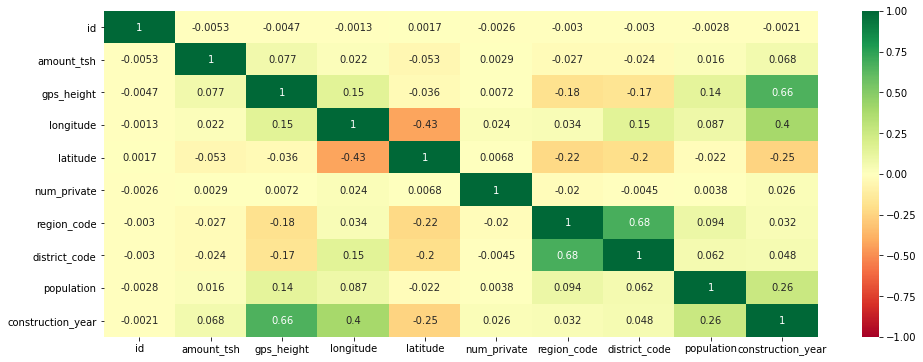

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(Train_X_raw.corr(), vmin=-1, vmax=1, annot=True, cmap='RdYlGn')

**Noticeable correlation between **
- region_code and district_code - 0.68
- construction_year and gps_height - 0.66
- population and construction year - 0.26
- latitude and longitude (-ve) not worth exploring

**None of the above have null values**


# 5. Prepare your data (*create transformers' pipeline*)

## *Important notes:*
1. Split your dataset in train and test before applying any fit method.
2. fit ONLY training data
3. Transform both train and test


In [ ]:
Train_X_raw['date_recorded'] = pd.to_datetime(Train_X_raw["date_recorded"]).dt.strftime("%Y%m%d")

In [ ]:
Train_X_raw

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,20110314,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,20130306,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,20130225,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,20130128,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,20110713,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,20130503,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,20110507,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,20110411,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,20110308,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


## 5.1 Feature engineering
* Missing values
* Label encoding
* Outlier handling
* Scaling
* Dimensionality reduction

### 5.1.1 Missing Values - Numerical and Categorical **Imputer**



Handling missing values:
https://feature-engine.readthedocs.io/en/latest/imputation/index.html

### 5.1.1.1 No need for Numerical Imputer as none of the numerical columns have missing values

In [ ]:
# Numerical missing values. Use median for skewed data and mean for gaussian distributions

#from feature_engine.imputation import MeanMedianImputer
#num_imputer = MeanMedianImputer()

# Categorical missing values will replace NaN with Missing
#from feature_engine.imputation import CategoricalImputer
#cat_imputer = CategoricalImputer(value='Missing')


In [ ]:
# Drop Scheme_name as it has 47.4% missing values
X = Train_X_raw.drop(['scheme_name'],axis=1)
Train_X_raw = X

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


### 5.1.1.2 Impute Cateogrical Columns

##### All of our missing value columns are categorical in nature. 

Also we will use KNNImputer instead of coding them as "missing". 

1. For us to use KNNImputer as a first step, categorical values need to be encoded into numericals.

2. After that we will run KNN Imputer

Columns to be imputed
- scheme_management         
- installer                 
- funder                    
- public_meeting            
- permit                    
- subvillage                

In [ ]:
# Encode and Impute - 
# 1. the process to pull non-null data, encode it and return it to the dataset is below.
# 2. impute the missing values using KNN - ExtraTreesRegressor
# https://towardsdatascience.com/preprocessing-encode-and-knn-impute-all-categorical-features-fast-b05f50b4dfaa

# instantiate both packages to use
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
#from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OrdinalEncoder

cat_encoder = OrdinalEncoder()
cat_imputer = IterativeImputer(ExtraTreesRegressor())

# Create a list of categorical columns to iterate over to encode and prepare for imputing
cat_cols = ['funder','installer','subvillage','public_meeting','scheme_management','permit', 'wpt_name','basin','region','lga','ward','recorded_by',
            'extraction_type','extraction_type_group','extraction_type_class','management','management_group','payment',
            'payment_type','water_quality','quality_group','quantity','quantity_group','source','source_type',
            'source_class','waterpoint_type','waterpoint_type_group']

# Define the process to pull non-null data, encode it and return it to the 
# dataset
def encode_for_imputing(data):
    ''' function to encode non-null data and replace it in the original data'''
    #retains only non-null values in a single row multiple columns
    nonulls = np.array(data.dropna())
    #print('nonulls ', nonulls)
    #reshapes the data for encoding - converts into one column multiple rows
    impute_reshape = nonulls.reshape(-1,1) # (-1,1) means unknows rows adn 1 column shape
    #print('impute reshape ', impute_reshape)
    #encode data
    impute_ordinal = cat_encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()]=np.squeeze(impute_ordinal)
    return data

# Create a for loop to interate through each columns in the data
for columns in  cat_cols:
  encode_for_imputing(Train_X_raw[columns])

#pd.options.display.max_columns = None
#pd.options.display.max_rows = None

In [ ]:
Train_X_raw

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,20110314,1369,1390,1518,34.938093,-9.856322,37399.0,0,1.0,11807,3.0,11,5,51.0,1426.0,109,1,0.0,7,0,1999,3.0,1.0,0.0,7.0,4.0,2.0,0.0,6.0,2.0,1.0,1.0,8.0,6.0,0.0,1.0,1.0
1,8776,0.0,20130306,469,1399,545,34.698766,-2.147466,37195.0,0,4.0,15838,9.0,20,2,103.0,1576.0,280,NaN,0.0,2,1,2010,3.0,1.0,0.0,11.0,4.0,0.0,2.0,6.0,2.0,2.0,2.0,5.0,3.0,1.0,1.0,1.0
2,34310,25.0,20130225,825,686,2048,37.460664,-3.821329,14572.0,0,5.0,9074,8.0,21,4,108.0,1624.0,250,1,0.0,7,1,2009,3.0,1.0,0.0,7.0,4.0,4.0,5.0,6.0,2.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0
3,67743,0.0,20130128,1741,263,1852,38.486161,-11.155298,37285.0,0,7.0,8982,12.0,90,63,87.0,1571.0,58,1,0.0,7,1,1986,14.0,10.0,5.0,7.0,4.0,0.0,2.0,6.0,2.0,0.0,0.0,3.0,0.0,0.0,2.0,1.0
4,19728,0.0,20110713,20,0,119,31.130847,-1.825359,35529.0,0,4.0,7698,4.0,18,1,26.0,1687.0,0,1,0.0,NaN,1,0,3.0,1.0,0.0,1.0,1.0,0.0,2.0,6.0,2.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,20130503,436,1210,201,37.169807,-3.253847,513.0,0,5.0,5681,6.0,3,5,16.0,1090.0,125,1,0.0,10,1,1999,3.0,1.0,0.0,9.0,4.0,4.0,5.0,6.0,2.0,1.0,1.0,8.0,6.0,0.0,1.0,1.0
59396,27263,4700.0,20110507,177,1212,265,35.249991,-9.070629,24074.0,0,6.0,2980,3.0,11,4,91.0,353.0,56,1,0.0,7,1,1996,3.0,1.0,0.0,7.0,4.0,2.0,0.0,6.0,2.0,1.0,1.0,6.0,4.0,1.0,1.0,1.0
59397,37057,0.0,20110411,NaN,0,NaN,34.017087,-8.750434,27926.0,0,6.0,8784,10.0,12,7,59.0,177.0,0,1,0.0,7,0,0,15.0,11.0,1.0,7.0,4.0,3.0,1.0,1.0,1.0,1.0,1.0,3.0,0.0,0.0,4.0,3.0
59398,31282,0.0,20110308,884,0,1213,35.861315,-6.378573,29693.0,0,6.0,14012,2.0,1,4,11.0,1449.0,0,1,0.0,7,1,0,8.0,5.0,1.0,7.0,4.0,0.0,2.0,6.0,2.0,2.0,2.0,7.0,5.0,0.0,4.0,3.0


In [ ]:
Train_X_raw.isnull().mean().sort_values(ascending=False)*100

scheme_management        6.526936
installer                6.153199
funder                   6.119529
public_meeting           5.612795
permit                   5.144781
subvillage               0.624579
ward                     0.000000
lga                      0.000000
district_code            0.000000
region_code              0.000000
region                   0.000000
waterpoint_type_group    0.000000
basin                    0.000000
population               0.000000
wpt_name                 0.000000
latitude                 0.000000
longitude                0.000000
gps_height               0.000000
date_recorded            0.000000
amount_tsh               0.000000
num_private              0.000000
recorded_by              0.000000
waterpoint_type          0.000000
water_quality            0.000000
source_class             0.000000
source_type              0.000000
source                   0.000000
quantity_group           0.000000
quantity                 0.000000
quality_group 

In [ ]:
# impute data and convert 
Encoded_X_df = pd.DataFrame(np.round(cat_imputer.fit_transform(Train_X_raw)),columns = Train_X_raw.columns)
#Encoded_X_df = cat_imputer.fit_transform(Train_X_raw)

In [ ]:
Train_X_raw = Encoded_X_df

In [ ]:
Train_y_raw = pd.DataFrame(cat_encoder.fit_transform(Train_y_raw))
Train_y_raw

,0,1
0,55621.0,0.0
1,7021.0,0.0
2,27491.0,0.0
3,54138.0,2.0
4,15816.0,0.0
...,...,...
59395,48549.0,0.0
59396,21855.0,0.0
59397,29696.0,0.0
59398,25101.0,0.0


### 5.1.2 Label encoding
Categorical encoders: https://feature-engine.readthedocs.io/en/latest/encoding/index.html

#### We will use the same cat_encoder for ALL Categorical Rare label encoding


### 5.1.3 Handling outliers: https://feature-engine.readthedocs.io/en/latest/outliers/index.html

In [ ]:
# Winsorizer() caps maximum and / or minimum values of a variable
!pip install feature_engine
from feature_engine.outliers import Winsorizer
capper = Winsorizer(capping_method='iqr', tail='both')

###5.1.4 Data scaling: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

In [ ]:
# The most popular scalers are StandardScaler and RobustScaler. More info in the link above

# Recommended use of sklearn wrapper to continue working with DataFrames
from sklearn.preprocessing import RobustScaler
from feature_engine.wrappers import SklearnTransformerWrapper
scaler = SklearnTransformerWrapper(transformer = RobustScaler())

### 5.1.5 Dimensionality reduction with PCA: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [ ]:
# Use n_components < 1 for explained variance sum and n_components > 1 for specific number of components to keep
# Besides PCA you can also try LDA, tSNE, IsoMap, etc.

from sklearn.decomposition import PCA
dim_red = SklearnTransformerWrapper(transformer = PCA(n_components=0.95))

## 5.2 Feature selection
https://scikit-learn.org/stable/modules/feature_selection.html

https://feature-engine.readthedocs.io/en/latest/selection/index.html

In [ ]:
# Basic feature selection: remove constant, quasi-constant and duplicate variables

from feature_engine.selection import DropConstantFeatures
cons_features = DropConstantFeatures(tol=0.95)

from feature_engine.selection import DropDuplicateFeatures
duplicates = DropDuplicateFeatures()

In [ ]:
# Correlated feature selection (colinearity)

# Change scoring, selection_method, and estimator when applicable
from feature_engine.selection import SmartCorrelatedSelection
corr_features = SmartCorrelatedSelection(selection_method="variance",estimator=None, scoring='roc_auc')

For wrapper algorithms (Forward selection, backward selection, exhaustive search) refer to:
* Forward/backward selection: http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/
* Exhaustive search: http://rasbt.github.io/mlxtend/user_guide/feature_selection/ExhaustiveFeatureSelector/

*NOTE: Wrapper methods are computationally greedy and require a model to be tried on.*

In [ ]:
# Embedded feature selection with sklearn.feature_selection.SelectFromModel

# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html


* **Build RFclassifier**
Hybrid feature selection techniques:
* **SelectByShuffling**: selects features by determining the drop in machine learning model performance when each feature’s values are randomly shuffled
* **RecursiveFeatureElimination** and RecursiveFeatureAddition: selects features following a recursive process


In [ ]:
# Fitting classifier to the Training set
# Create your classifier here

# Predicting the Test set results

from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(warm_start=True,n_estimators=10, max_depth=5, n_jobs=-1, verbose=10)

In [ ]:
#pip install git+git://github.com/scikit-learn/scikit-learn.git

### Build Train and Test X_train, X_test, y_train and y_test

In [ ]:
from sklearn.model_selection import train_test_split

#X = Train_X_raw.drop(columns=['Target'])
#y = Train_X_raw['Target']

# For the larger the dataset, the smaller the test 
X_train, X_test, y_train, y_test = train_test_split(Train_X_raw, Train_y_raw, test_size=0.30, random_state=42)

## 5.3 Create your transformer pipeline


In [ ]:
X_train

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
43069,9358.0,500.0,20110415.0,1371.0,1846.0,10.0,35.0,-9.0,10568.0,0.0,6.0,5185.0,3.0,11.0,4.0,91.0,1183.0,45.0,1.0,0.0,8.0,1.0,2009.0,3.0,1.0,0.0,10.0,4.0,3.0,1.0,6.0,2.0,0.0,0.0,8.0,6.0,0.0,1.0,1.0
58858,31628.0,0.0,20110721.0,1741.0,0.0,1852.0,31.0,-3.0,6938.0,0.0,4.0,12121.0,4.0,18.0,30.0,89.0,70.0,0.0,1.0,0.0,9.0,0.0,0.0,4.0,2.0,1.0,11.0,4.0,0.0,2.0,6.0,2.0,1.0,1.0,7.0,5.0,0.0,4.0,3.0
41707,15603.0,0.0,20130330.0,1107.0,1840.0,1247.0,35.0,-3.0,33610.0,0.0,0.0,8768.0,0.0,2.0,5.0,90.0,233.0,135.0,1.0,0.0,7.0,1.0,2005.0,7.0,4.0,2.0,7.0,4.0,0.0,2.0,6.0,2.0,2.0,2.0,3.0,0.0,0.0,1.0,1.0
30674,37051.0,0.0,20110324.0,727.0,1202.0,807.0,38.0,-5.0,19963.0,15.0,5.0,6605.0,20.0,4.0,1.0,52.0,244.0,1.0,1.0,0.0,7.0,1.0,1975.0,3.0,1.0,0.0,7.0,4.0,0.0,2.0,6.0,2.0,1.0,1.0,8.0,6.0,0.0,1.0,1.0
20944,52389.0,30.0,20110228.0,608.0,60.0,723.0,39.0,-7.0,33198.0,0.0,8.0,6574.0,14.0,60.0,43.0,69.0,2060.0,1041.0,1.0,0.0,7.0,0.0,2010.0,14.0,10.0,5.0,7.0,4.0,4.0,5.0,6.0,2.0,1.0,1.0,3.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,68525.0,1000.0,20110320.0,292.0,327.0,390.0,36.0,-9.0,15748.0,0.0,6.0,1153.0,11.0,5.0,4.0,122.0,1393.0,255.0,1.0,0.0,10.0,1.0,1995.0,3.0,1.0,0.0,11.0,4.0,3.0,1.0,6.0,2.0,1.0,1.0,6.0,4.0,1.0,1.0,1.0
38158,11980.0,1000.0,20110310.0,261.0,1743.0,336.0,35.0,-10.0,37399.0,0.0,1.0,11589.0,3.0,11.0,5.0,51.0,1292.0,35.0,1.0,0.0,7.0,0.0,1988.0,3.0,1.0,0.0,7.0,4.0,2.0,0.0,6.0,2.0,3.0,3.0,8.0,6.0,0.0,1.0,1.0
860,35778.0,0.0,20110313.0,1188.0,-13.0,1341.0,39.0,-5.0,21173.0,0.0,5.0,17844.0,20.0,4.0,5.0,95.0,1771.0,1000.0,0.0,0.0,4.0,0.0,2005.0,9.0,6.0,3.0,4.0,0.0,0.0,2.0,6.0,2.0,2.0,2.0,7.0,5.0,0.0,6.0,5.0
15795,49444.0,0.0,20121031.0,1416.0,0.0,1956.0,34.0,-3.0,30338.0,0.0,4.0,3082.0,17.0,17.0,6.0,64.0,1844.0,0.0,1.0,0.0,9.0,1.0,0.0,8.0,5.0,1.0,11.0,4.0,0.0,2.0,6.0,2.0,1.0,1.0,7.0,5.0,0.0,4.0,3.0


In [ ]:
y_test

,0,1
2980,29731.0,2.0
5246,11638.0,0.0
22659,50028.0,0.0
39888,36840.0,2.0
13361,37680.0,0.0
...,...,...
13160,32355.0,0.0
3852,46299.0,2.0
28598,42960.0,0.0
43736,48007.0,0.0


In [ ]:
capper.fit_transform(X_train, y_train)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
43069,9358.0,80.0,20110415.0,1371.0,1846.0,10.0,35.0,-9.0,10568.0,0.0,6.0,5185.0,3.0,11.0,4.0,91.0,1183.0,45.0,1.0,0.0,7.0,1.0,2009.0,3.0,1.0,0.0,7.0,4.0,3.0,1.0,6.0,2.0,0.0,0.0,8.0,6.0,0.0,1.0,1.0
58858,31628.0,0.0,20110721.0,1741.0,0.0,1852.0,31.0,-3.0,6938.0,0.0,4.0,12121.0,4.0,18.0,14.0,89.0,70.0,0.0,1.0,0.0,7.0,0.0,0.0,4.0,2.0,1.0,7.0,4.0,0.0,2.0,6.0,2.0,1.0,1.0,7.0,5.0,0.0,4.0,3.0
41707,15603.0,0.0,20130330.0,1107.0,1840.0,1247.0,35.0,-3.0,33610.0,0.0,0.0,8768.0,0.0,2.0,5.0,90.0,233.0,135.0,1.0,0.0,7.0,1.0,2005.0,7.0,4.0,2.0,7.0,4.0,0.0,2.0,6.0,2.0,2.0,2.0,3.0,0.0,0.0,1.0,1.0
30674,37051.0,0.0,20110324.0,727.0,1202.0,807.0,38.0,-5.0,19963.0,0.0,5.0,6605.0,20.0,4.0,1.0,52.0,244.0,1.0,1.0,0.0,7.0,1.0,1975.0,3.0,1.0,0.0,7.0,4.0,0.0,2.0,6.0,2.0,1.0,1.0,8.0,6.0,0.0,1.0,1.0
20944,52389.0,30.0,20110228.0,608.0,60.0,723.0,39.0,-7.0,33198.0,0.0,8.0,6574.0,14.0,53.0,14.0,69.0,2060.0,852.0,1.0,0.0,7.0,0.0,2010.0,14.0,10.0,5.0,7.0,4.0,4.0,5.0,6.0,2.0,1.0,1.0,3.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,68525.0,80.0,20110320.0,292.0,327.0,390.0,36.0,-9.0,15748.0,0.0,6.0,1153.0,11.0,5.0,4.0,122.0,1393.0,255.0,1.0,0.0,7.0,1.0,1995.0,3.0,1.0,0.0,7.0,4.0,3.0,1.0,6.0,2.0,1.0,1.0,6.0,4.0,0.0,1.0,1.0
38158,11980.0,80.0,20110310.0,261.0,1743.0,336.0,35.0,-10.0,37399.0,0.0,1.0,11589.0,3.0,11.0,5.0,51.0,1292.0,35.0,1.0,0.0,7.0,0.0,1988.0,3.0,1.0,0.0,7.0,4.0,2.0,0.0,6.0,2.0,3.0,3.0,8.0,6.0,0.0,1.0,1.0
860,35778.0,0.0,20110313.0,1188.0,-13.0,1341.0,39.0,-5.0,21173.0,0.0,5.0,17844.0,20.0,4.0,5.0,95.0,1771.0,852.0,1.0,0.0,7.0,0.0,2005.0,9.0,6.0,3.0,7.0,4.0,0.0,2.0,6.0,2.0,2.0,2.0,7.0,5.0,0.0,6.0,5.0
15795,49444.0,0.0,20121031.0,1416.0,0.0,1956.0,34.0,-3.0,30338.0,0.0,4.0,3082.0,17.0,17.0,6.0,64.0,1844.0,0.0,1.0,0.0,7.0,1.0,0.0,8.0,5.0,1.0,7.0,4.0,0.0,2.0,6.0,2.0,1.0,1.0,7.0,5.0,0.0,4.0,3.0


In [ ]:
scaler.fit_transform(X_train, y_train)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
43069,-0.743456,25.0,-0.534885,0.823799,1.118182,-0.712373,0.00,-0.666667,-0.524357,0.0,0.50,-0.495700,-0.636364,-0.083333,0.333333,0.491803,0.137561,0.093897,0.0,0.0,1.0,0.0,0.011477,-0.166667,-0.2,-0.5,3.0,0.0,0.25,-0.333333,0.0,0.0,-1.0,-1.0,0.333333,0.333333,0.0,-0.333333,0.0
58858,-0.143736,0.0,-0.519437,1.247140,-0.280303,2.276673,-1.00,0.333333,-0.686363,0.0,0.00,0.278926,-0.545455,0.500000,9.000000,0.459016,-0.948293,-0.117371,0.0,0.0,2.0,-1.0,-0.991018,0.000000,0.0,0.0,4.0,0.0,-0.50,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.666667,1.0
41707,-0.575281,0.0,0.470517,0.521739,1.113636,1.294929,0.00,0.333333,0.504006,0.0,-1.00,-0.095544,-0.909091,-0.833333,0.666667,0.475410,-0.789268,0.516432,0.0,0.0,0.0,0.0,0.009481,0.500000,0.4,0.5,0.0,0.0,-0.50,0.000000,0.0,0.0,1.0,1.0,-1.333333,-1.666667,0.0,-0.333333,0.0
30674,0.002302,0.0,-0.539479,0.086957,0.630303,0.580933,0.75,0.000000,-0.105059,15.0,0.25,-0.337112,0.909091,-0.666667,-0.666667,-0.147541,-0.778537,-0.112676,0.0,0.0,0.0,0.0,-0.005489,-0.166667,-0.2,-0.5,0.0,0.0,-0.50,0.000000,0.0,0.0,0.0,0.0,0.333333,0.333333,0.0,-0.333333,0.0
20944,0.415347,1.5,-0.544326,-0.049199,-0.234848,0.444625,1.00,-0.333333,0.485618,0.0,1.00,-0.340574,0.363636,4.000000,13.333333,0.131148,0.993171,4.769953,0.0,0.0,0.0,-1.0,0.011976,1.666667,1.6,2.0,0.0,0.0,0.50,1.000000,0.0,0.0,0.0,0.0,-1.333333,-1.666667,0.0,-0.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,0.849882,50.0,-0.539681,-0.410755,-0.032576,-0.095740,0.25,-0.666667,-0.293174,0.0,0.50,-0.946002,0.090909,-0.583333,0.333333,1.000000,0.342439,1.079812,0.0,0.0,3.0,0.0,0.004491,-0.166667,-0.2,-0.5,4.0,0.0,0.25,-0.333333,0.0,0.0,0.0,0.0,-0.333333,-0.333333,1.0,-0.333333,0.0
38158,-0.672847,50.0,-0.540186,-0.446224,1.040152,-0.183367,0.00,-0.833333,0.673108,0.0,-0.75,0.219511,-0.636364,-0.083333,0.666667,-0.163934,0.243902,0.046948,0.0,0.0,0.0,-1.0,0.000998,-0.166667,-0.2,-0.5,0.0,0.0,0.00,-0.666667,0.0,0.0,2.0,2.0,0.333333,0.333333,0.0,-0.333333,0.0
860,-0.031979,0.0,-0.540034,0.614416,-0.290152,1.447465,1.00,0.000000,-0.051057,0.0,0.25,0.918081,0.909091,-0.666667,0.666667,0.557377,0.711220,4.577465,-1.0,0.0,-3.0,-1.0,0.009481,0.833333,0.8,1.0,-3.0,-4.0,-0.50,0.000000,0.0,0.0,1.0,1.0,0.000000,0.000000,0.0,1.333333,2.0
15795,0.336040,0.0,0.001060,0.875286,-0.280303,2.445436,-0.25,0.333333,0.357976,0.0,0.00,-0.730567,0.636364,0.416667,1.000000,0.049180,0.782439,-0.117371,0.0,0.0,2.0,0.0,-0.991018,0.666667,0.6,0.0,4.0,0.0,-0.50,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.666667,1.0


In [ ]:
cons_features.fit_transform(X_train, y_train)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
43069,9358.0,500.0,20110415.0,1371.0,1846.0,10.0,35.0,-9.0,10568.0,6.0,5185.0,3.0,11.0,4.0,91.0,1183.0,45.0,1.0,8.0,1.0,2009.0,3.0,1.0,0.0,10.0,4.0,3.0,1.0,6.0,2.0,0.0,0.0,8.0,6.0,0.0,1.0,1.0
58858,31628.0,0.0,20110721.0,1741.0,0.0,1852.0,31.0,-3.0,6938.0,4.0,12121.0,4.0,18.0,30.0,89.0,70.0,0.0,1.0,9.0,0.0,0.0,4.0,2.0,1.0,11.0,4.0,0.0,2.0,6.0,2.0,1.0,1.0,7.0,5.0,0.0,4.0,3.0
41707,15603.0,0.0,20130330.0,1107.0,1840.0,1247.0,35.0,-3.0,33610.0,0.0,8768.0,0.0,2.0,5.0,90.0,233.0,135.0,1.0,7.0,1.0,2005.0,7.0,4.0,2.0,7.0,4.0,0.0,2.0,6.0,2.0,2.0,2.0,3.0,0.0,0.0,1.0,1.0
30674,37051.0,0.0,20110324.0,727.0,1202.0,807.0,38.0,-5.0,19963.0,5.0,6605.0,20.0,4.0,1.0,52.0,244.0,1.0,1.0,7.0,1.0,1975.0,3.0,1.0,0.0,7.0,4.0,0.0,2.0,6.0,2.0,1.0,1.0,8.0,6.0,0.0,1.0,1.0
20944,52389.0,30.0,20110228.0,608.0,60.0,723.0,39.0,-7.0,33198.0,8.0,6574.0,14.0,60.0,43.0,69.0,2060.0,1041.0,1.0,7.0,0.0,2010.0,14.0,10.0,5.0,7.0,4.0,4.0,5.0,6.0,2.0,1.0,1.0,3.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,68525.0,1000.0,20110320.0,292.0,327.0,390.0,36.0,-9.0,15748.0,6.0,1153.0,11.0,5.0,4.0,122.0,1393.0,255.0,1.0,10.0,1.0,1995.0,3.0,1.0,0.0,11.0,4.0,3.0,1.0,6.0,2.0,1.0,1.0,6.0,4.0,1.0,1.0,1.0
38158,11980.0,1000.0,20110310.0,261.0,1743.0,336.0,35.0,-10.0,37399.0,1.0,11589.0,3.0,11.0,5.0,51.0,1292.0,35.0,1.0,7.0,0.0,1988.0,3.0,1.0,0.0,7.0,4.0,2.0,0.0,6.0,2.0,3.0,3.0,8.0,6.0,0.0,1.0,1.0
860,35778.0,0.0,20110313.0,1188.0,-13.0,1341.0,39.0,-5.0,21173.0,5.0,17844.0,20.0,4.0,5.0,95.0,1771.0,1000.0,0.0,4.0,0.0,2005.0,9.0,6.0,3.0,4.0,0.0,0.0,2.0,6.0,2.0,2.0,2.0,7.0,5.0,0.0,6.0,5.0
15795,49444.0,0.0,20121031.0,1416.0,0.0,1956.0,34.0,-3.0,30338.0,4.0,3082.0,17.0,17.0,6.0,64.0,1844.0,0.0,1.0,9.0,1.0,0.0,8.0,5.0,1.0,11.0,4.0,0.0,2.0,6.0,2.0,1.0,1.0,7.0,5.0,0.0,4.0,3.0


In [ ]:
#duplicates.fit_tansform(X_train, y_train)

In [ ]:
#corr_features.fit_tansform(X_train, y_train)

In [ ]:
y_train

,0,1
43069,7492.0,2.0
58858,25371.0,0.0
41707,12491.0,2.0
30674,29690.0,0.0
20944,41929.0,0.0
...,...,...
54343,54764.0,0.0
38158,9592.0,0.0
860,28662.0,2.0
15795,39574.0,0.0


In [ ]:
# train the model
rf_classifier.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 10
building tree 2 of 10


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    6.0s


building tree 3 of 10
building tree 4 of 10
building tree 5 of 10


[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   18.9s


building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   41.2s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=10,
                       warm_start=True)

In [ ]:
# get predictions
predictions = rf_classifier.predict(X_test)

NameError: ignored

In [ ]:
# Import make_pipeline
from sklearn.pipeline import make_pipeline

# Define pipeline steps
impute_encode_pipe = make_pipeline(#num_imputer,
                                 cat_imputer,
                                 #rare_encoder,
                                 #cat_encoder,
                                 capper,
                                 scaler,
                                 cons_features,
                                 duplicates,
                                 corr_features,
                                 )

# Define pipeline steps
transformer_pipe = make_pipeline(
                                 recursive_selector,
                                 dim_red,
                                 )

In [ ]:
impute_encode_pipe.fit_transform(X_train, y_train)

In [ ]:
type(X_train[:1000])

In [ ]:
#fit and transform

#for _ in range(10): # 10 passes through the data
 #   for X, y in data_splits: 
        #clf.fit(X,y)

X_train = transformer_pipe.fit_transform(X_train[:1000], y_train[:1000])
  #      rf_classifier.n_estimators += 1 # increment by one so next  will add 1 tree


In [ ]:
# Check the depth of the first tree in the Random Forest
print(rf_classifier.estimators_[0].tree_.max_depth)

In [ ]:
# Let’s check the depth of all the trees in the Forest:
depths = [tree.tree_.max_depth for tree in rf_classifier.estimators_]
print(f"Mean tree depth in the Random Forest: {np.round(np.mean(depths))}")

In [ ]:
# Check the size of single tree in the disk after saving with joblib:

joblib.dump(rf_classifier.estimators_[0], "first_tree_from_RF.joblib") 
print(f"Single tree size: {np.round(os.path.getsize('first_tree_from_RF.joblib') / 1024 / 1024, 2) } MB")


In [ ]:
joblib.dump(rf_classifier, "RandomForest_100_trees.joblib") 
print(f"Random Forest size: {np.round(os.path.getsize('RandomForest_100_trees.joblib') / 1024 / 1024, 2) } MB")

In [ ]:
X_test = transformer_pipe.transform(X_test, y_test)

In [ ]:
y_predicted = rf_classifier.predict_proba(X_test)
rf_loss = log_loss(y_test, y_predicted)
print(rf_loss)

In [ ]:
# Save pipeline in pickle file
import pickle

with open ('transformer_pipeline.pkl', 'wb') as name:
  pickle.dump(transformer_pipe, name)

# 6. Try different algorithms
(https://mlflow.org/ can be used to track models’ performance and hyper parameters)
* Try default hyperparameters first (unless you have good notion on what hyperparams will improve performance and their values)
* Measure and compare performance
* Short-list top 1-3 models for hyperparameter tuning


In [ ]:
# Import algorithms to try

from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from tpot import TPOTRegressor
from catboost import CatBoostRegressor

In [ ]:
# Create table with models and its performance
# IMPORTANT NOTE: change metrics and algorithms as you see fit

# Define algorithms to try
algorithms = []
algorithms.append(('ElasticNet', ElasticNet()))
algorithms.append(('Random Forest', RandomForestRegressor()))
algorithms.append(('XG Boost', XGBRegressor()))
algorithms.append(('LightGBM', LGBMRegressor()))
algorithms.append(('Genetic', TPOTRegressor()))
algorithms.append(('CatBoost', CatBoostRegressor()))

# Initialize lists
names = []
train_rmse = []
test_rmse = []
train_r2 = []
test_r2 = []
cross_validation_scores = []
runtime = []

# Iterate ofer each element in algorithms
for name, reg in algorithms:
  t1 = time.time()
  names.append(name)
  reg.fit(X_train, y_train)
  train_rmse.append(sqrt(mean_squared_error(y_train, reg.predict(X_train))))
  test_rmse.append(sqrt(mean_squared_error(y_test, reg.predict(X_test))))
  train_r2.append(r2_score(y_train, reg.predict(X_train)))
  test_r2.append(r2_score(y_test, reg.predict(X_test)))
  cross_validation_scores.append(cross_val_score(reg, np.vstack((X_train, X_test)), np.hstack((y_train, y_test))).mean())
  t2 = time.time()
  runtime.append(t2-t1)

# Create comparison dataframe
model_comparison = pd.DataFrame({'Algorithm': names,
                                 'Train RMSE': train_rmse,
                                 'Test_RMSE': test_rmse,
                                 'Train r2 score': train_r2,
                                 'Test r2 score': test_r2,
                                 'Cross validation score': cross_validation_scores,
                                 'Runtime': runtime,})

# Sort by Test_RMSE
model_comparison.sort_values(by=['Test_RMSE'])